In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
from module import carrington, toSunpyMap

import sunpy

In [9]:
map = toSunpyMap('carrington_test_data/imoa_06563_l1_20240306_13270563_emi1.fts.bz2')

coordinates = sunpy.map.all_coordinates_from_map(map)
coordinates = sunpy.map.all_coordinates_from_map(map)
weights = coordinates.transform_to("heliocentric").z.value

mu = np.array(weights / np.nanmax(weights))

weights = np.array(np.ones(mu.shape) - mu)


In [16]:
map.meta

MetaDict([('wcsaxes': '2')
('crpix1': '1025.0')
('crpix2': '1025.0')
('cdelt1': '1.1877680509756612')
('cdelt2': '1.1877680509756612')
('cunit1': 'arcsec')
('cunit2': 'arcsec')
('ctype1': 'HPLN-TAN')
('ctype2': 'HPLT-TAN')
('crval1': '0.0')
('crval2': '0.0')
('lonpole': '180.0')
('latpole': '0.0')
('mjdref': '0.0')
('date-obs': '2024-03-06T13:27:00.000')
('rsun_ref': '695700000.0')
('dsun_obs': '148438672857.4')
('hgln_obs': '0.0')
('hglt_obs': '-7.2518568151587')
('naxis': '2')
('naxis1': '2048')
('naxis2': '2048')
('pc1_1': '1.0')
('pc1_2': '-0.0')
('pc2_1': '0.0')
('pc2_2': '1.0')
('rsun_obs': '820.0254243241625')])

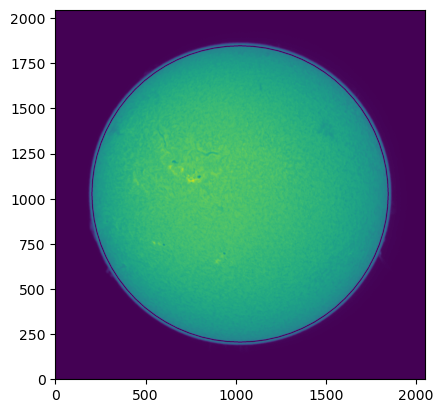

In [17]:
import cv2 as cv

image = map.data
cv.circle(image, (1024, 1024), 820, (0, 255, 0), thickness=5)

plt.imshow(image, origin='lower')

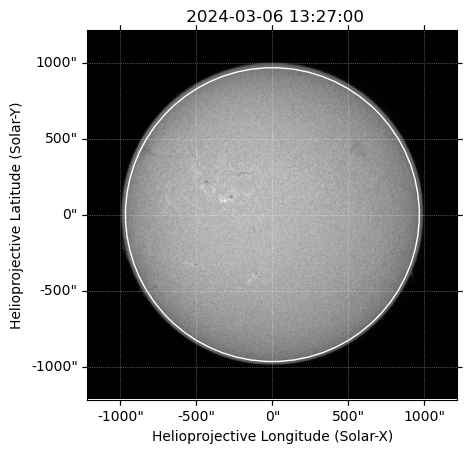

In [15]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
map.plot(axes=ax)
map.draw_limb(axes=ax);

# Carrington sunmap

In [3]:
folder = 'carrington_test_data/'

carrington_list = []
for filename in os.listdir(folder):
    carrington_list.append(carrington(folder + filename, flat=True).data)

In [4]:
img = np.full(carrington_list[0].data.shape, np.nan)

img = np.nanmin(carrington_list, axis=0)

C:\Users\lherrington\AppData\Local\Temp\ipykernel_13636\3646129219.py:3: RuntimeWarning: All-NaN axis encountered
  img = np.nanmin(carrington_list, axis=0)


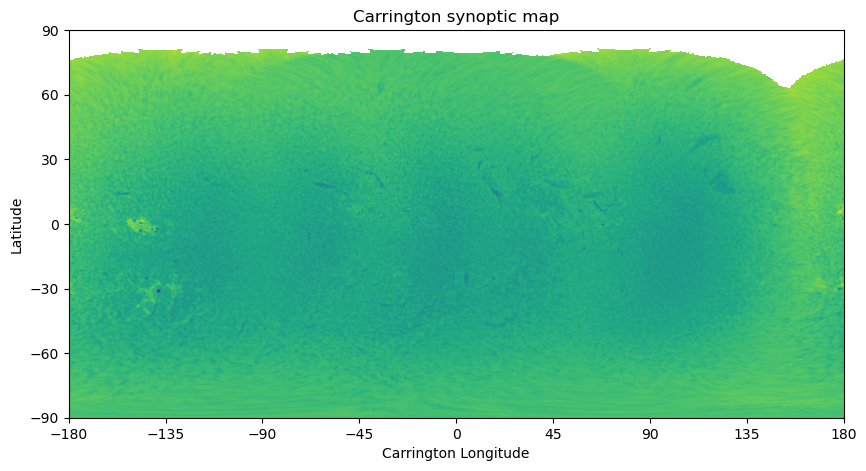

In [5]:
fig = plt.figure(figsize=(10,10))
plt.imshow(img, origin='lower', extent=[-180,180,-90,90])
 
plt.xticks(np.arange(-180, 181, 45))
plt.yticks(np.arange(-90, 91, 30))
 
plt.axis()

plt.xlabel('Carrington Longitude');
plt.ylabel('Latitude');

plt.title('Carrington synoptic map');